In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf
import time as t

In [2]:
w=32

In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [4]:
dataFromSensors=np.load("DataWithLabels/dataFromSensors_"+str(w)+".npy")

In [5]:
np.info(dataFromSensors)

class:  ndarray
shape:  (475305, 32, 16)
strides:  (4096, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x161445bc040
byteorder:  little
byteswap:  False
type: float64


In [6]:
labels=np.load("DataWithLabels/labels_"+str(w)+".npy")

In [7]:
np.info(labels)

class:  ndarray
shape:  (475305,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x161b8671040
byteorder:  little
byteswap:  False
type: float64


In [8]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [9]:
training_sample_labels

380244

In [10]:
training_sample

380244

In [11]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [12]:
train_X.shape

(380244, 32, 15)

In [13]:
train_y

array([0., 0., 0., ..., 0., 0., 0.])

In [14]:
#print(train_X)

In [15]:
train_y.shape

(380244,)

In [16]:
#print(test_y)

In [17]:
train_y=train_y.reshape(train_y.shape[0],1)

In [18]:
test_y=test_y.reshape(test_y.shape[0],1)

In [19]:
#print(train_X)

In [20]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(380244, 32, 15) (380244, 1) (95061, 32, 15) (95061, 1)


In [21]:
model_gru =  keras.models.Sequential([
    keras.layers.GRU(128,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2])),
    keras.layers.GRU(units=64,return_sequences=True),
    keras.layers.GRU(units=32),
    keras.layers.Dense(units=50,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])
opt=keras.optimizers.Adam(learning_rate=0.0007)
model_gru.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])

In [22]:
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 32, 128)           55680     
                                                                 
 gru_1 (GRU)                 (None, 32, 64)            37248     
                                                                 
 gru_2 (GRU)                 (None, 32)                9408      
                                                                 
 dense (Dense)               (None, 50)                1650      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 104,037
Trainable params: 104,037
Non-trainable params: 0
_________________________________________________________________


In [23]:
 start = t.time()

In [24]:
gru_history = model_gru.fit(train_X, train_y, epochs=140,validation_data=(test_X, test_y),batch_size=16384)#, shuffle=False)

Epoch 1/140
24/24 [==============================] - 100s 4s/step - loss: 0.6872 - accuracy: 0.5573 - val_loss: 0.5594 - val_accuracy: 0.7530
Epoch 2/140
24/24 [==============================] - 96s 4s/step - loss: 0.5760 - accuracy: 0.7393 - val_loss: 0.5597 - val_accuracy: 0.7530
Epoch 3/140
24/24 [==============================] - 99s 4s/step - loss: 0.5739 - accuracy: 0.7393 - val_loss: 0.5594 - val_accuracy: 0.7530
Epoch 4/140
24/24 [==============================] - 99s 4s/step - loss: 0.5738 - accuracy: 0.7393 - val_loss: 0.5596 - val_accuracy: 0.7530
Epoch 5/140
24/24 [==============================] - 96s 4s/step - loss: 0.5737 - accuracy: 0.7393 - val_loss: 0.5593 - val_accuracy: 0.7530
Epoch 6/140
24/24 [==============================] - 96s 4s/step - loss: 0.5733 - accuracy: 0.7393 - val_loss: 0.5589 - val_accuracy: 0.7530
Epoch 7/140
24/24 [==============================] - 96s 4s/step - loss: 0.5714 - accuracy: 0.7393 - val_loss: 0.5538 - val_accuracy: 0.7530
Epoch 8/140


Epoch 59/140
24/24 [==============================] - 95s 4s/step - loss: 0.4381 - accuracy: 0.7761 - val_loss: 0.4339 - val_accuracy: 0.7775
Epoch 60/140
24/24 [==============================] - 95s 4s/step - loss: 0.4375 - accuracy: 0.7763 - val_loss: 0.4358 - val_accuracy: 0.7768
Epoch 61/140
24/24 [==============================] - 95s 4s/step - loss: 0.4376 - accuracy: 0.7763 - val_loss: 0.4336 - val_accuracy: 0.7780
Epoch 62/140
24/24 [==============================] - 95s 4s/step - loss: 0.4379 - accuracy: 0.7767 - val_loss: 0.4342 - val_accuracy: 0.7781
Epoch 63/140
24/24 [==============================] - 95s 4s/step - loss: 0.4375 - accuracy: 0.7766 - val_loss: 0.4357 - val_accuracy: 0.7790
Epoch 64/140
24/24 [==============================] - 93s 4s/step - loss: 0.4367 - accuracy: 0.7770 - val_loss: 0.4391 - val_accuracy: 0.7781
Epoch 65/140
24/24 [==============================] - 95s 4s/step - loss: 0.4363 - accuracy: 0.7773 - val_loss: 0.4322 - val_accuracy: 0.7803
Epoch 

24/24 [==============================] - 95s 4s/step - loss: 0.4251 - accuracy: 0.7827 - val_loss: 0.4377 - val_accuracy: 0.7805
Epoch 117/140
24/24 [==============================] - 95s 4s/step - loss: 0.4250 - accuracy: 0.7825 - val_loss: 0.4283 - val_accuracy: 0.7781
Epoch 118/140
24/24 [==============================] - 95s 4s/step - loss: 0.4250 - accuracy: 0.7829 - val_loss: 0.4273 - val_accuracy: 0.7810
Epoch 119/140
24/24 [==============================] - 95s 4s/step - loss: 0.4247 - accuracy: 0.7829 - val_loss: 0.4322 - val_accuracy: 0.7812
Epoch 120/140
24/24 [==============================] - 95s 4s/step - loss: 0.4239 - accuracy: 0.7834 - val_loss: 0.4273 - val_accuracy: 0.7807
Epoch 121/140
24/24 [==============================] - 96s 4s/step - loss: 0.4237 - accuracy: 0.7831 - val_loss: 0.4310 - val_accuracy: 0.7825
Epoch 122/140
24/24 [==============================] - 96s 4s/step - loss: 0.4246 - accuracy: 0.7833 - val_loss: 0.4286 - val_accuracy: 0.7796
Epoch 123/140

In [25]:
pred_y =  model_gru.predict(test_X)

2971/2971 [==============================] - 29s 10ms/step


In [26]:
stop=t.time()-start
print(stop)

13881.877894163132


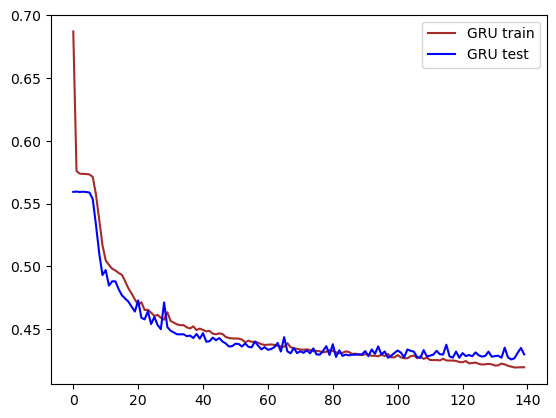

In [27]:
#plt.plot(gru_history.history['accuracy'], label='GRU accuracy', color='green')
#plt.plot(gru_history.history['val_accuracy'], label='GRU val_accuracy', color='yellow')
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

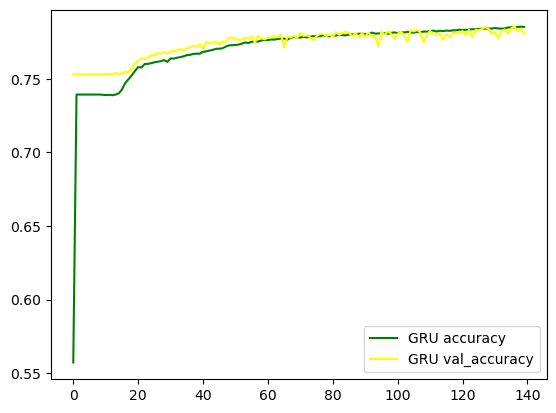

In [28]:
plt.plot(gru_history.history['accuracy'], label='GRU accuracy', color='green')
plt.plot(gru_history.history['val_accuracy'], label='GRU val_accuracy', color='yellow')
plt.legend()
plt.show()

In [29]:
print(test_y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [30]:
np.shape(pred_y)

(95061, 1)

In [31]:
pred_y

array([[0.00182912],
       [0.00356774],
       [0.00291342],
       ...,
       [0.03465332],
       [0.03571424],
       [0.03606896]], dtype=float32)

In [33]:
pred_y=np.reshape(pred_y,95061)

0.1435753428757963
0.22796233401237564
0.3789133712021737
0.2835535650774451


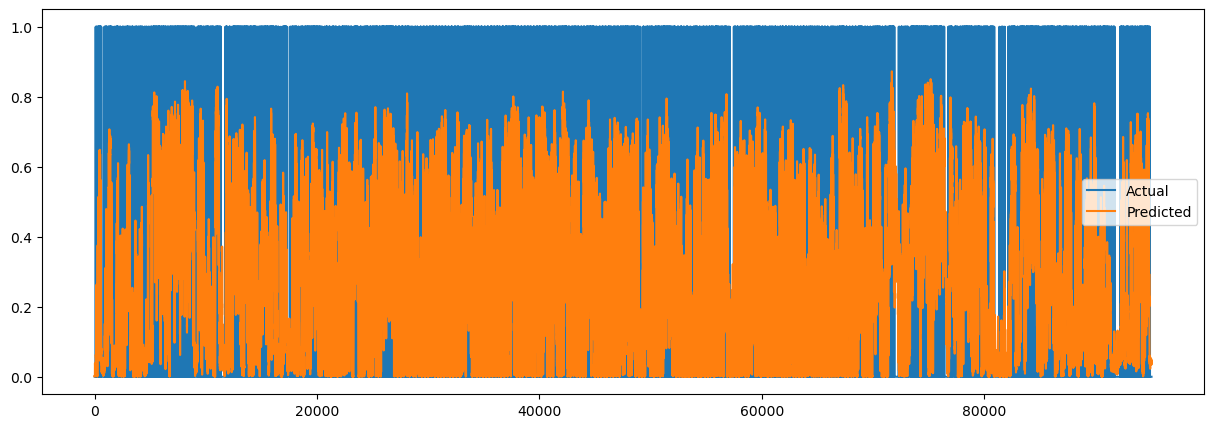

In [34]:

plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)


plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [35]:
np.shape(train_X)

(380244, 32, 15)

In [36]:
np.shape(train_y)

(380244, 1)

In [37]:
np.shape(test_X)

(95061, 32, 15)

In [38]:
np.shape(test_y)

(95061, 1)

14854/14854 [==============================] - 135s 9ms/step


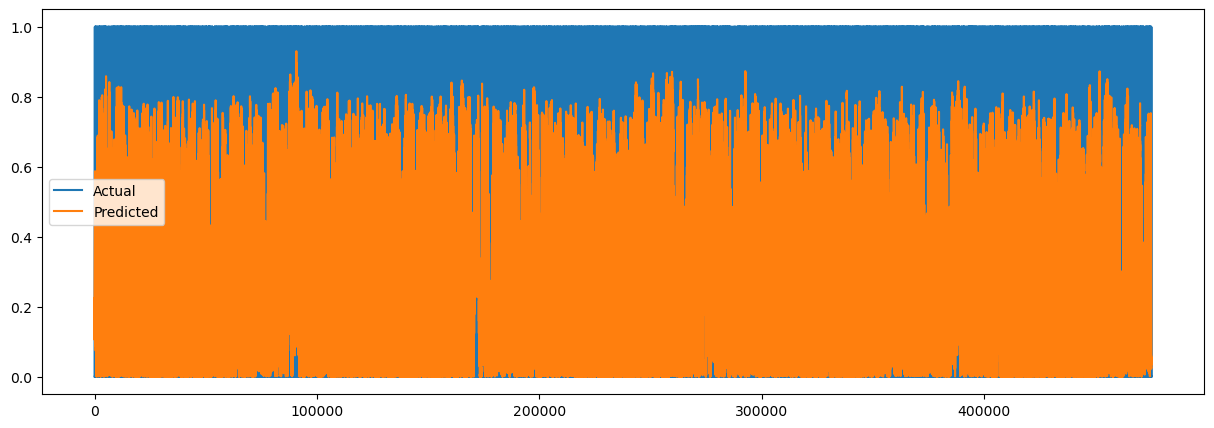

In [39]:
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

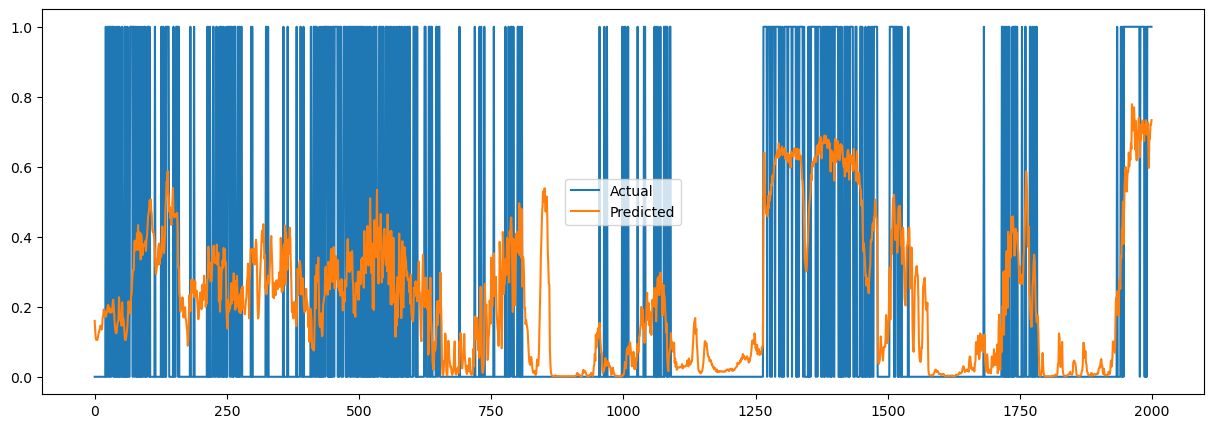

In [40]:
plt.plot(tes[:2000], label = 'Actual')
plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [41]:
print(sum(tes)/len(tes))

[0.25795437]


In [42]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.59906787]
[0.83490452]
total acc [0.78444157]


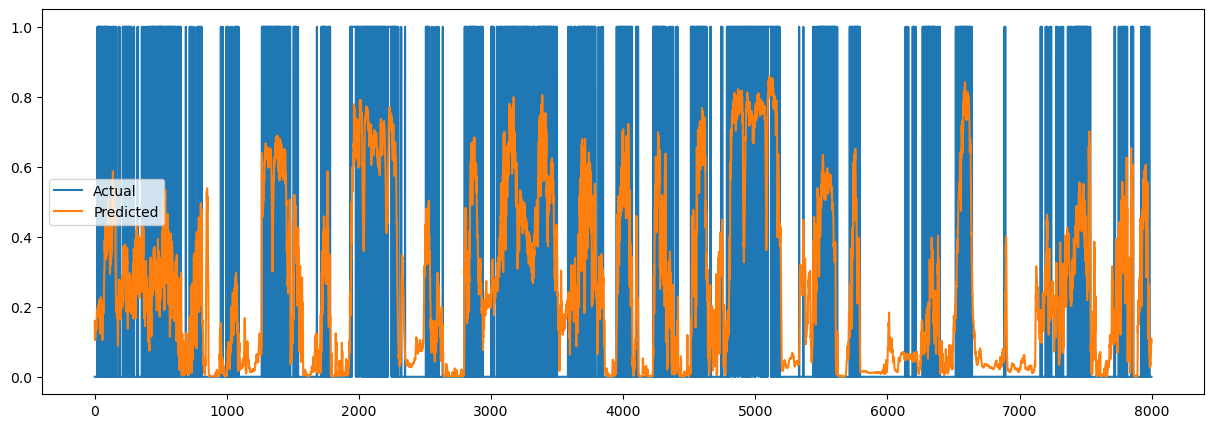

In [43]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

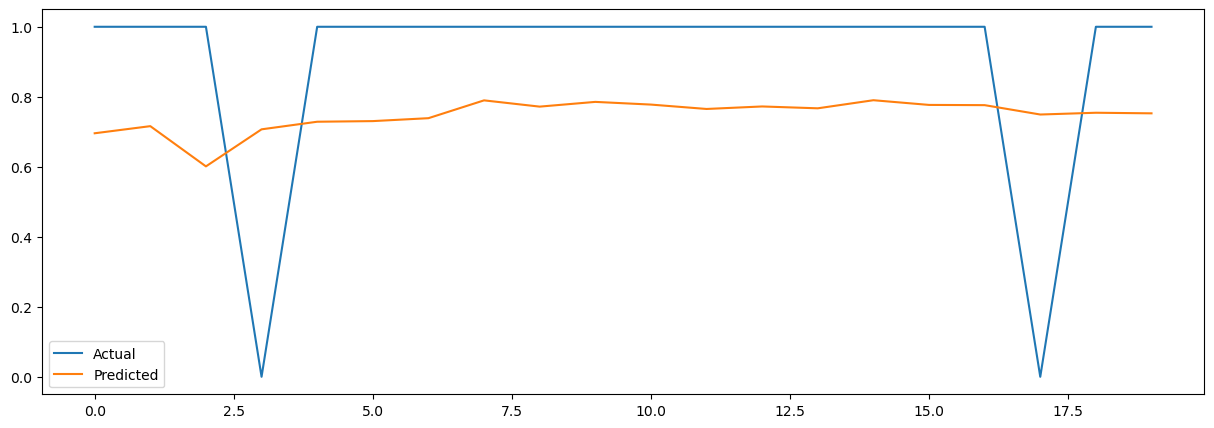

In [44]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

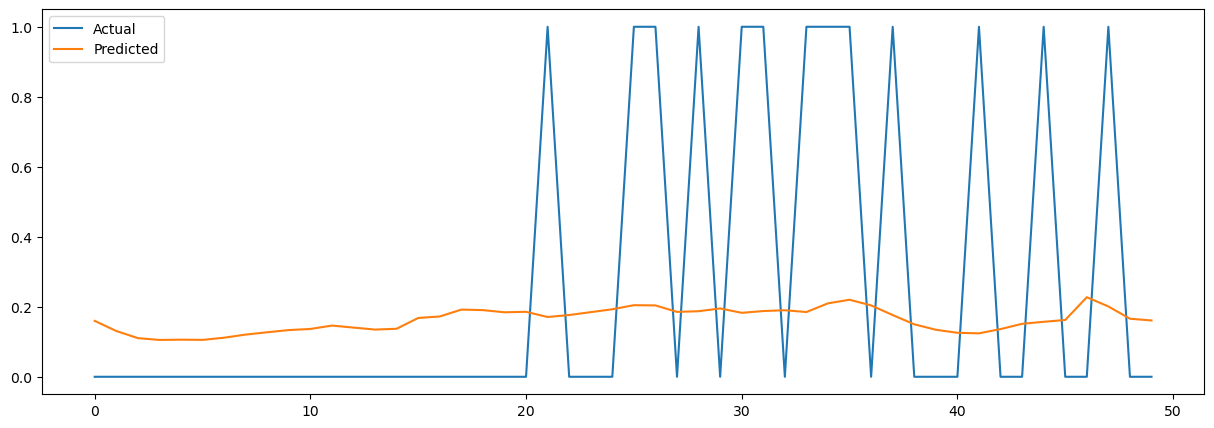

In [45]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

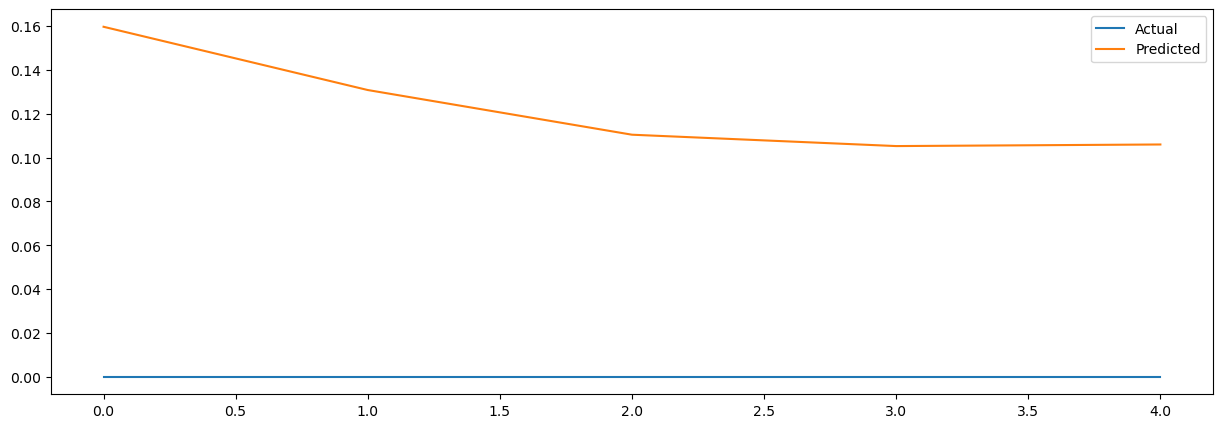

In [46]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()

In [47]:
tf.config.experimental.get_memory_info('GPU:0')

ValueError: No matching devices found for 'GPU:0'